
# <span style='color:green;font-size:200%'> Gráficos de COVID-19 por paises</span>
***

## <span style='color:blue;font-size:100%'> Paises selecionados:</span>
* USA        
* Brasil   
* Alemanha
* Itália   
* Russia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from read_covid19 import read

## <span style='color:red;font-size:100%'> Atualiza do dataset</span>

In [2]:
new = True

In [3]:
if new:    
    read()

---

In [4]:
dados = pd.read_csv('casos_e_mortes_confirmados.csv')

In [5]:
dados_grupo = dados.groupby('Pais')

In [6]:
dados_grupo.get_group('Brasil').tail(n=10)

,Data,Casos,Mortes,Pais,Dias,Casos_Media,Mortes_Media,Taxa_Casos_Media,Taxa_Mortes_Media,Taxa_Casos,Taxa_Mortes,Porcentagem,Porcentagem_Media
219,24/06/2020,1188631,53830,Brasil,99,1.086140e+06,50716.428571,35710.285714,1031.857143,39483.0,1141.0,4.53,4.53
220,25/06/2020,1228114,54971,Brasil,100,1.121851e+06,51748.285714,34580.142857,1001.000000,46860.0,990.0,4.48,4.48
221,26/06/2020,1274974,55961,Brasil,101,1.156431e+06,52749.285714,35155.428571,1013.428571,38693.0,1109.0,4.39,4.39
222,27/06/2020,1313667,57070,Brasil,102,1.191586e+06,53762.714286,37257.428571,1004.428571,30476.0,552.0,4.34,4.34
223,28/06/2020,1344143,57622,Brasil,103,1.228844e+06,54767.142857,37389.285714,1006.142857,24052.0,692.0,4.29,4.29
224,29/06/2020,1368195,58314,Brasil,104,1.266233e+06,55773.285714,36590.714286,992.714286,33846.0,1280.0,4.26,4.26
225,30/06/2020,1402041,59594,Brasil,105,1.302824e+06,56766.000000,37160.285714,971.714286,46712.0,1038.0,4.25,4.25
226,01/07/2020,1448753,60632,Brasil,106,1.339984e+06,57737.714286,38392.000000,987.571429,48105.0,1252.0,4.19,4.19
227,02/07/2020,1496858,61884,Brasil,107,1.378376e+06,58725.285714,37729.571429,1030.428571,42223.0,1290.0,4.13,4.13
228,03/07/2020,1539081,63174,Brasil,108,1.416105e+06,59755.714286,NaN,NaN,NaN,NaN,4.10,4.10


In [7]:
#paises = ['USA', 'Brasil', 'Espanha', 'Alemanha', 'Itália', 'Turquia' ]
paises = ['USA', 'Brasil', 'Alemanha', 'Itália', 'Russia' ]
paises_sem = ['Brasil', 'Russia', 'Itália', 'USA']
# cores
cor = { 'Brasil'   :      'black',
         'USA'     :       'blue',
         'Itália'  :          'm',
         'Espanha' :        'red',
         'Russia'  : 'darkorange',
         'Alemanha':       'green'}
# transparencia

alpha ={ 'Brasil'   :     1.0,
         'USA'     :      0.6,
         'Itália'  :      0.6,
         'Espanha' :      0.6,
         'Russia'  :      0.6,
         'Alemanha':      0.6}

#
mar = { 'Brasil'   :     None,
         'USA'     :      'o',
         'Itália'  :      '^',
         'Espanha' :      'x',
         'Russia'  :      's',
         'Alemanha':      'p'}

#
lw = { 'Brasil'   :     3,
         'USA'     :     1,
         'Itália'  :     1,
         'Espanha' :     1,
         'Russia'  :     1,
         'Alemanha':     1}

# divisao do eixo x
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico em logY dos casos totais confirmados</span>
---

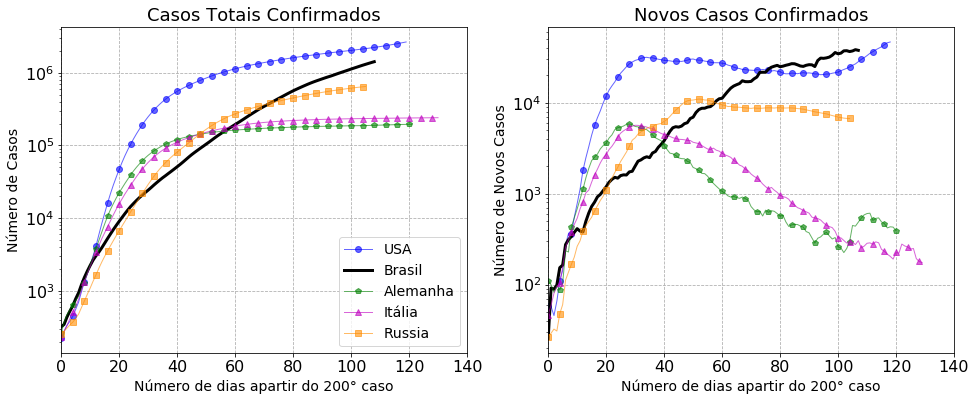

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)

    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 140)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 140)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [9]:
fig.savefig('casos.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

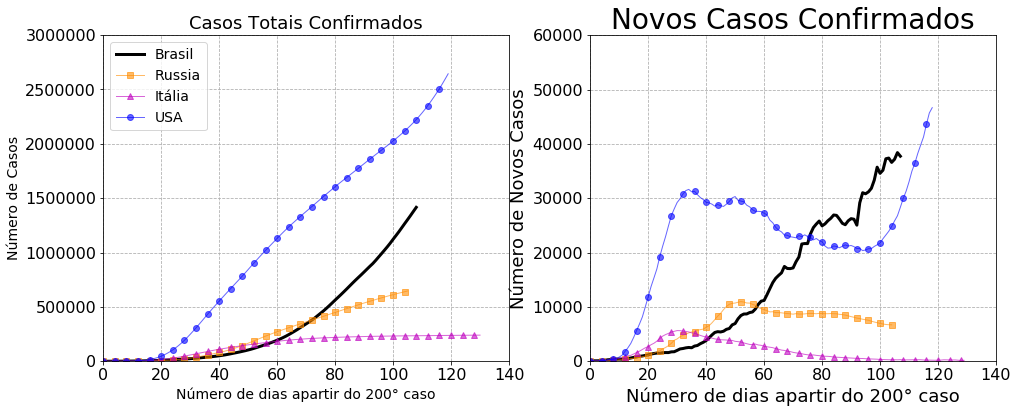

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)

    ax2.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 140)
ax1.set_ylim(0, 3000000)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 140)
ax2.set_ylim(0, 60000)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novos Casos', fontsize = 18)
ax2.set_title('Novos Casos Confirmados', fontsize = 28)
ax2.grid(ls = '--')

ax1

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico logY de mortes confirmadas</span>
---

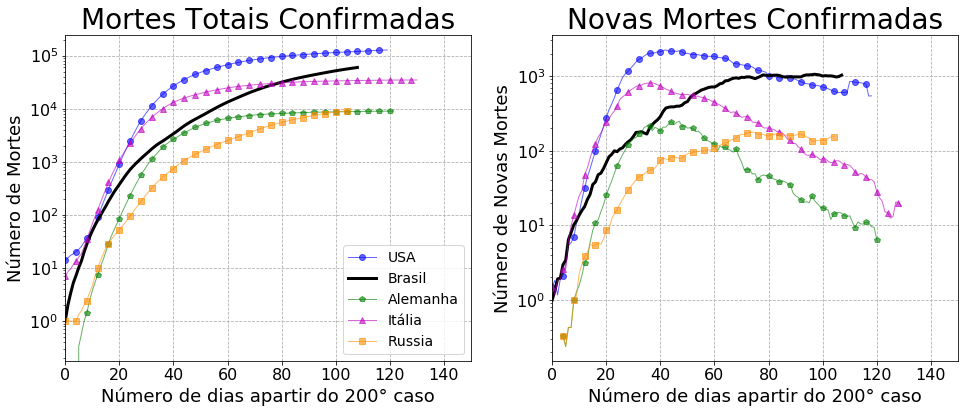

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Mortes_Media'].get_group(name), 
                 label  = name, 
                 ls     = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
    
    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Mortes_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 150)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax1.set_ylabel('Número de Mortes', fontsize = 18)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 28)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 150)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 18)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 28)
ax2.grid(ls = '--')

ax1

In [12]:
fig.savefig('mortes.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

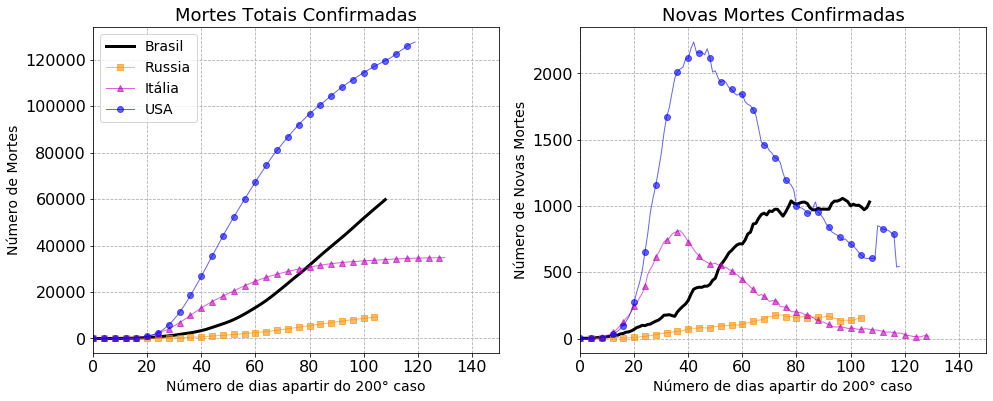

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 4)
    
    ax2.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Taxa_Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 4)

#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 150)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Mortes', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 150)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 14)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

---
---
##  <span style='color:green;font-size:150%'> Plotando Porcentagem de Mortes </span>
-----

### $n_{casos} \rightarrow $  número total de casos confirmadas
### $n_{mortes}\rightarrow $  número total de mortes confirmadas

### $p = \frac{n_{mortes}}{n_{casos}} \times 100\rightarrow $ Porcentual de mortes


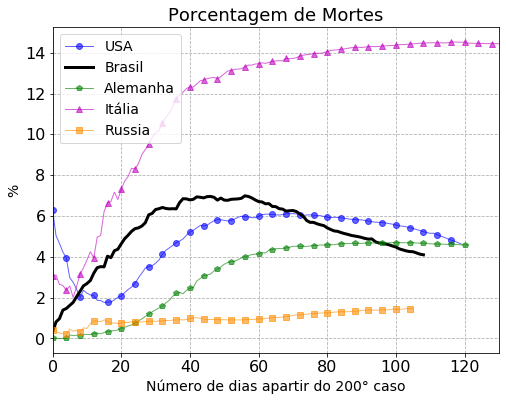

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, name in enumerate(paises):
    ax.plot(dados_grupo.get_group(name).Dias,
            dados_grupo['Porcentagem_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 4)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_xlim(0, 130)
ax.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax.set_ylabel('%', fontsize = 14)
ax.legend(loc = 'upper left', fontsize = 14)
ax.set_title('Porcentagem de Mortes', fontsize = 18)
ax.grid(ls = '--')

ax

In [15]:
fig.savefig('porcentagem_de_mortos.png', dpi = 300)

---
---